In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
df= pd.read_csv("linear_regression_train.csv", sep = ",", header = 0, index_col="ID") 
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Target
ID,,,,,,,,,,,,,,,,,,,,,
1,-10.429837,21.684251,93.056324,128.914740,1.657315,-34.602633,-70.314374,-89.585318,-98.465642,32.708495,...,-99.322780,19.560135,25.568291,-40.876179,-116.146068,-82.181299,-99.423518,-41.150654,113.117197,5235.690928
2,12.475081,11.652011,-47.621889,-21.892583,-25.844861,-46.951253,-114.500805,-96.257473,-138.354981,3.507057,...,-89.763107,-8.250307,-8.798353,-23.452091,-56.769063,-26.722372,-97.694304,13.816113,8.711894,-1221.442146
3,7.696188,24.729547,43.782383,-53.282523,-69.145794,-57.072335,-114.149171,-105.408739,-71.892560,66.893460,...,-3.859655,-17.301240,-1.622924,-39.351214,-73.973949,-33.844638,-100.874861,-38.895598,34.488334,-1102.758862
4,6.505033,22.092605,-25.161422,4.742729,-20.344550,-50.248793,-89.324731,-104.002016,-160.103875,7.199201,...,48.557507,-1.997502,-0.856194,-34.259923,-3.113819,13.398035,-94.899866,-77.051331,-16.014027,437.940266
5,5.906445,19.909180,24.705865,-51.875251,-24.857500,-25.879977,-37.787560,-99.587673,-47.929647,58.730086,...,3.556973,-26.643253,-0.976567,-44.127974,-44.249542,-6.166813,-97.099111,-5.426910,-42.191157,755.825367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47996,3.562959,11.486509,61.145800,2.805889,-28.902789,-30.775352,-66.414021,-103.186976,-130.046256,67.510295,...,-105.482960,48.452228,-0.643498,-1.883623,-80.008729,-27.849186,-92.497409,-69.854208,47.798525,3353.082152
47997,-2.748224,22.360721,124.499793,-21.230197,-60.030819,-27.661729,-60.773068,-102.180412,-140.769031,65.528252,...,-101.472074,-36.467914,7.985939,-30.925713,-134.529393,5.100088,-87.846292,-21.788868,9.368803,2149.681236
47998,13.876292,26.976793,86.952262,-70.016487,-10.544583,-71.143920,-138.125870,-97.217351,-92.475987,58.045244,...,-134.999520,4.757532,16.897211,-20.287205,-100.728629,-48.036962,-102.180933,-63.056645,109.054688,-1703.219366


In [4]:
df.isnull().sum()

Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Target        0
dtype: int64

In [5]:
df.duplicated().value_counts()

False    48000
Name: count, dtype: int64

In [6]:

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, tolerance=1e-9, lambda_=0.1, regularization="none", optimizer="sgd", batch_size=None, decimals = 4):
        """
        Initialize the Linear Regression model.
        
        Parameters:
            learning_rate (float): Learning rate for gradient descent. Default is 0.01. 
            epochs (int): Number of iterations for gradient descent. Default is 1000. 
            tolerance (float): Early stopping threshold for changes in loss. Default is 1e-9
            lambda_ (float): Regularization strength for regularization. Default is 0.1
            regularization (str): "l1", "l2", or "none". Default is none.
            optimizer (str): "sgd", "batch", "mini-batch", "adam". Default is sgd.
            batch_size (int): Batch size for mini-batch gradient descent. Default is None. 
            decimals (int): Round up to decimal. Default is 4. 
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tolerance = tolerance
        self.lambda_ = lambda_
        self.regularization = regularization  # "l1", "l2", or "none"
        self.optimizer = optimizer
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.train_loss_history = []
        self.val_loss_history = []
        self.decimals = decimals
    def load_data(self, file_path):
        """
        Load the data from a CSV file and return X and y matrices.
        
        Parameters:
            file_path (str): Path to the CSV file.
        
        Returns:
            X (numpy.ndarray): Feature matrix.
            y (numpy.ndarray): Target vector.
        """
        df = pd.read_csv(file_path, sep = ",", header=0, index_col= "ID")  
        X = df.iloc[:, :-1].values  
        y = df.iloc[:, -1].values  
        return X, y
        
    def preprocess(self, X):
        """
        Normalize the features to have zero mean and unit variance.
        """
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return (X - self.mean) / self.std

    def compute_loss(self, X, y):
        """
        Compute the Mean Squared Error (MSE) with optional regularization.
        """
        m = len(y)
        y_pred = np.dot(X, self.weights) + self.bias
        loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        
        # Add regularization term if applicable
        if self.regularization == "l2":
            loss += (self.lambda_ / (2 * m)) * np.sum(self.weights ** 2)
        elif self.regularization == "l1":
            loss += (self.lambda_ / m) * np.sum(np.abs(self.weights))
        
        return loss

    def train_val_split(self, X, y, val_ratio=0.2, shuffle=False):
        """
        Split the dataset into training and validation sets.
        
        Parameters:
            X (numpy.ndarray): Feature matrix.
            y (numpy.ndarray): Target vector.
            val_ratio (float): Proportion of data to use for validation.
            shuffle (bool): Whether to shuffle the data before splitting.
        
        Returns:
            X_train, X_val, y_train, y_val
        """
        if shuffle:
            indices = np.random.permutation(len(y))
            X, y = X[indices], y[indices]

        split_idx = int(len(y) * (1 - val_ratio))
        X_train, X_val = X[:split_idx], X[split_idx:]
        y_train, y_val = y[:split_idx], y[split_idx:]

        return X_train, X_val, y_train, y_val

    def fit(self, X, y, val_ratio=None):
        if val_ratio is not None:
            X_train, X_val, y_train, y_val = self.train_val_split(X, y, val_ratio=val_ratio)
        else:
            X_train, y_train = X, y
            X_val, y_val = None, None
    
        # Normalize training data
        X_train = self.preprocess(X_train)
        n_samples, n_features = X_train.shape
    
        # Normalize validation data using training statistics
        if X_val is not None:
            X_val = (X_val - self.mean) / self.std

        self.X_val = X_val  # Store validation data for metrics
        self.y_val = y_val
        if self.optimizer == "normal":
            # Add bias term as a column of ones
            X_b = np.c_[np.ones((n_samples, 1)), X_train]
            # Regularization matrix
            self.weights = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train
            self.bias = self.weights[0]
            self.weights = self.weights[1:]
            print("Training completed using the Normal Equation.")
            if X_val is not None and y_val is not None:
                val_loss = self.compute_loss(X_val, y_val)
                self.val_loss_history.append(val_loss)

            # Print the final results immediately after Normal Equation training
            print(f"Final Train Loss = {self.compute_loss(X_train, y_train):.4f}", end="")
            if X_val is not None:
                print(f", Final Val Loss = {val_loss:.4f}")
            
            return 
            
            
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-8
        m_w = np.zeros_like(self.weights)
        v_w = np.zeros_like(self.weights)
        m_b = 0
        v_b = 0
        t = 1
        for epoch in range(self.epochs):
            if self.optimizer == "sgd":
                # Stochastic Gradient Descent with shuffling
                indices = np.random.permutation(n_samples)
                X_train, y_train = X_train[indices], y_train[indices]
                for i in range(n_samples):
                    xi = X_train[i, :].reshape(1, -1)
                    yi = y_train[i]
                    y_pred = np.dot(xi, self.weights) + self.bias
                    dw = np.dot(xi.T, (y_pred - yi))
                    db = np.sum(y_pred - yi)
                    if self.regularization == "l2":
                        dw += (self.lambda_ / n_samples) * self.weights
                    elif self.regularization == "l1":
                        dw += (self.lambda_ / n_samples) * np.sign(self.weights)
                    self.weights -= self.learning_rate * dw
                    self.bias -= self.learning_rate * db
    
            elif self.optimizer == "batch":
                # Batch Gradient Descent
                y_pred = np.dot(X_train, self.weights) + self.bias
                dw = (1 / n_samples) * np.dot(X_train.T, (y_pred - y_train))
                db = (1 / n_samples) * np.sum(y_pred - y_train)
                if self.regularization == "l2":
                    dw += (self.lambda_ / n_samples) * self.weights
                elif self.regularization == "l1":
                    dw += (self.lambda_ / n_samples) * np.sign(self.weights)
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            elif self.optimizer == "adam":
                # Adam Optimizer
                y_pred = (np.dot(X_train, self.weights) + self.bias)
                dw = (1 / n_samples) * np.dot(X_train.T, (y_pred - y_train))
                db = (1 / n_samples) * np.sum(y_pred - y_train)
                if self.regularization == "l2":
                    dw += (self.lambda_ / n_samples) * self.weights
                elif self.regularization == "l1":
                    dw += (self.lambda_ / n_samples) * np.sign(self.weights)
                # Update first and second moments for weights
                m_w = beta1 * m_w + (1 - beta1) * dw
                v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)

                # Update first and second moments for bias
                m_b = beta1 * m_b + (1 - beta1) * db
                v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

                # Compute bias-corrected first and second moments
                m_w_hat = m_w / (1 - beta1 ** t)
                v_w_hat = v_w / (1 - beta2 ** t)
                m_b_hat = m_b / (1 - beta1 ** t)
                v_b_hat = v_b / (1 - beta2 ** t)

                # Update weights and bias
                self.weights -= self.learning_rate * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
                self.bias -= self.learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)
                t+=1
    
            elif self.optimizer == "mini-batch":
                # Mini-Batch Gradient Descent
                indices = np.random.permutation(n_samples)
                X_train, y_train = X_train[indices], y_train[indices]
                for i in range(0, n_samples, self.batch_size):
                    X_mini = X_train[i:i+self.batch_size]
                    y_mini = y_train[i:i+self.batch_size]
                    y_pred = np.dot(X_mini, self.weights) + self.bias
                    dw = (1 / len(y_mini)) * np.dot(X_mini.T, (y_pred - y_mini))
                    db = (1 / len(y_mini)) * np.sum(y_pred - y_mini)
                    self.weights -= self.learning_rate * dw
                    self.bias -= self.learning_rate * db
    
            else:
                raise ValueError(f"Unknown optimizer: {self.optimizer}")
    
            # Training Loss
            train_loss = self.compute_loss(X_train, y_train)
            self.train_loss_history.append(train_loss)
    
            # Validation Loss
            if X_val is not None and y_val is not None:
                val_loss = self.compute_loss(X_val, y_val)
                self.val_loss_history.append(val_loss)
    
            # Print Progress
            if epoch % 10 == 0 or epoch == self.epochs - 1:
                print(f"Epoch {epoch:4d}: Train Loss = {train_loss:.4f}", end="")
                if X_val is not None:
                    print(f", Val Loss = {val_loss:.4f}")
                else:
                    print()

        return 
    def predict(self, X, check):
        """
        Make predictions using the trained model.
        """
        if check == False:
            X = (X - self.mean) / self.std
        return np.dot(X, self.weights) + self.bias
    def evaluate_metrics(self, X, y, check=False):
        """
        Evaluate performance metrics: Mean Squared Error (MSE), R² Score, Mean Absolute Error (MAE), and Explained Variance Score.
    
        Parameters:
            X (numpy.ndarray): Feature matrix.
            y (numpy.ndarray): True labels.
            check (bool): Whether to evaluate on validation data.
    
        Returns:
            dict: A dictionary containing evaluation metrics.
        """
        metrics = {}
    
        # Use validation data if check=True
        if check:
            X_eval, y_eval = self.X_val, self.y_val
        else:
            X_eval, y_eval = X, y
    
        # Predictions
        y_pred = self.predict(X_eval, check)
    
        # Metrics Calculation
        mse = np.mean((y_eval - y_pred) ** 2)
        mae = np.mean(np.abs(y_eval - y_pred))
        variance = np.var(y_eval)
        explained_variance = 1 - np.var(y_eval - y_pred) / variance
    
        # R² Score
        ss_total = np.sum((y_eval - np.mean(y_eval)) ** 2)
        ss_residual = np.sum((y_eval - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
    
        # Store metrics
        metrics["Mean Squared Error"] = np.round(mse, self.decimals)
        metrics["Mean Absolute Error"] = np.round(mae, self.decimals)
        metrics["R² Score"] = np.round(r2, self.decimals)
        metrics["Explained Variance"] = np.round(explained_variance, self.decimals)
    
        # Display Metrics
        metrics = {key: float(value) for key, value in metrics.items()}
        print(f"Evaluation Metrics: {metrics}")
        return metrics

    def plot_loss(self):
        """ Plot training and validation loss curves. """
        plt.plot(range(len(self.train_loss_history)), self.train_loss_history, label="Train Loss")
        plt.plot(range(len(self.val_loss_history)), self.val_loss_history, label="Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()



Epoch    0: Train Loss = 3038632.2328, Val Loss = 3060964.9015
Epoch   10: Train Loss = 2499518.1326, Val Loss = 2518072.0948
Epoch   20: Train Loss = 2057946.6463, Val Loss = 2073376.5224
Epoch   30: Train Loss = 1696263.1914, Val Loss = 1709110.3134
Epoch   40: Train Loss = 1400009.6553, Val Loss = 1410721.6286
Epoch   50: Train Loss = 1157345.4538, Val Loss = 1166292.3499
Epoch   60: Train Loss = 958573.4837, Val Loss = 966061.2423
Epoch   70: Train Loss = 795751.9575, Val Loss = 802033.4774
Epoch   80: Train Loss = 662376.5560, Val Loss = 667660.8729
Epoch   90: Train Loss = 553120.1553, Val Loss = 557580.0361
Epoch  100: Train Loss = 463619.6971, Val Loss = 467397.9216
Epoch  110: Train Loss = 390301.6583, Val Loss = 393516.2165
Epoch  120: Train Loss = 330239.1283, Val Loss = 332987.5188
Epoch  130: Train Loss = 281034.7673, Val Loss = 283397.5521
Epoch  140: Train Loss = 240724.9571, Val Loss = 242768.7016
Epoch  150: Train Loss = 207701.3061, Val Loss = 209481.0098
Epoch  160: 

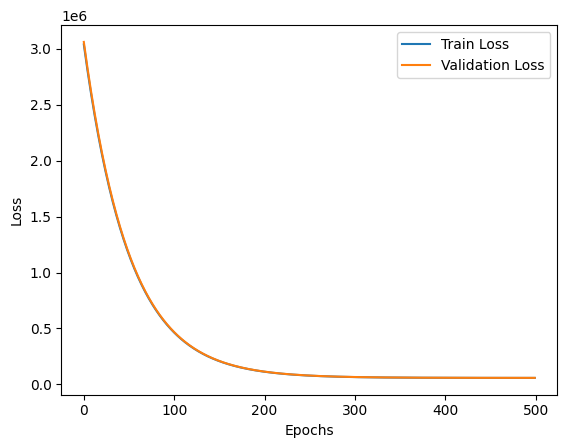

Evaluation Metrics: {'Mean Squared Error': 116360.35, 'Mean Absolute Error': 272.9705, 'R² Score': 0.975, 'Explained Variance': 0.975}
[ 1.29446538e+02  2.74024330e+00  5.19932895e+02  7.29958478e+02
  1.68571954e-01  8.06067215e+02  4.39774677e+02 -1.50132728e-01
  6.42538521e+02  2.25067735e+02  6.14282218e-01  6.27849779e-01
  7.57247093e+02  6.59545163e+02 -1.75330287e+00  5.24638530e+02
  3.04005190e+01  4.47382861e+02  4.11527030e+02  6.90008813e+02
  9.42677113e+01  6.23357800e-01  1.05906134e+02  4.89426292e+02
 -7.43980785e-01]
1236.4195770053054


In [55]:
file_path = 'linear_regression_train.csv'
model = LinearRegression(learning_rate=0.01, epochs=500, lambda_=0.1, regularization="l2", optimizer="batch")

X, y = model.load_data(file_path)
model.fit(X, y, val_ratio=0.2)
model.plot_loss()
model.evaluate_metrics(X, y, check=False)
print(model.weights)
print(model.bias)

Epoch    0: Train Loss = 6.4470438833312909991946071e+04, Val Loss = 6.5839661546748553519137204e+04
Epoch   10: Train Loss = 6.6142459510796295944601297e+04, Val Loss = 6.7172733931793962256051600e+04
Epoch   20: Train Loss = 6.1881989137392956763505936e+04, Val Loss = 6.3703456116189947351813316e+04
Epoch   30: Train Loss = 6.2416879356435048975981772e+04, Val Loss = 6.3734553380732504592742771e+04
Epoch   40: Train Loss = 6.7453585879859980195760727e+04, Val Loss = 6.8684303176671252003870904e+04
Epoch   50: Train Loss = 6.6420065497099072672426701e+04, Val Loss = 6.7467628883574376231990755e+04
Epoch   60: Train Loss = 6.7424368535336776403710246e+04, Val Loss = 6.8517659585830275318585336e+04
Epoch   70: Train Loss = 6.9757732839908116147853434e+04, Val Loss = 7.0484938304337498266249895e+04
Epoch   80: Train Loss = 6.3082066870548551378306001e+04, Val Loss = 6.4482316453879451728425920e+04
Epoch   90: Train Loss = 6.9535062439773260848596692e+04, Val Loss = 7.00994869426529621705

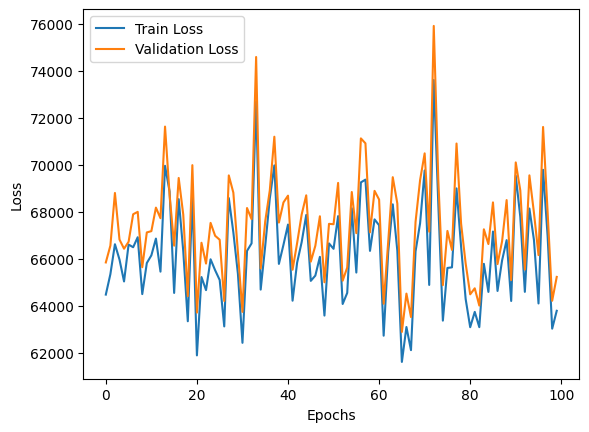

[125.57075184   8.5257072  523.1397678  707.88840821 -50.44312115
 816.15481415 459.4618426  -12.08287528 688.49480249 204.00234904
 -18.21067384  12.07646853 785.20033431 696.02045048   6.45583973
 546.39657964  58.00235871 431.96706101 399.29248619 673.25894123
 100.40796707 -16.3511817  144.77274427 480.83312374  -1.20506485]
1249.5113873657083


In [51]:
file_path = 'linear_regression_train.csv'
model = LinearRegression(learning_rate=0.01, epochs=100, lambda_=0.1, regularization="l2")
#sgd
X, y = model.load_data(file_path)
model.fit(X, y, val_ratio=0.2)
model.plot_loss()
print(model.weights)
print(model.bias)

Epoch    0: Train Loss = 59397.6215, Val Loss = 59656.1352
Epoch   10: Train Loss = 57983.3853, Val Loss = 58486.4907
Epoch   20: Train Loss = 57988.9571, Val Loss = 58480.6948
Epoch   30: Train Loss = 58002.5059, Val Loss = 58434.5598
Epoch   40: Train Loss = 57996.4967, Val Loss = 58391.3142
Epoch   50: Train Loss = 57995.5097, Val Loss = 58409.0116
Epoch   60: Train Loss = 57981.2970, Val Loss = 58432.5111
Epoch   70: Train Loss = 57985.1738, Val Loss = 58416.3758
Epoch   80: Train Loss = 57978.2643, Val Loss = 58432.4815
Epoch   90: Train Loss = 57985.2276, Val Loss = 58378.6794
Epoch  100: Train Loss = 57982.6414, Val Loss = 58377.6405
Epoch  110: Train Loss = 57975.2021, Val Loss = 58416.7393
Epoch  120: Train Loss = 57994.7240, Val Loss = 58498.3713
Epoch  130: Train Loss = 57995.6788, Val Loss = 58422.8531
Epoch  140: Train Loss = 58000.0057, Val Loss = 58398.5999
Epoch  150: Train Loss = 57997.7243, Val Loss = 58434.9771
Epoch  160: Train Loss = 58001.8745, Val Loss = 58426.21

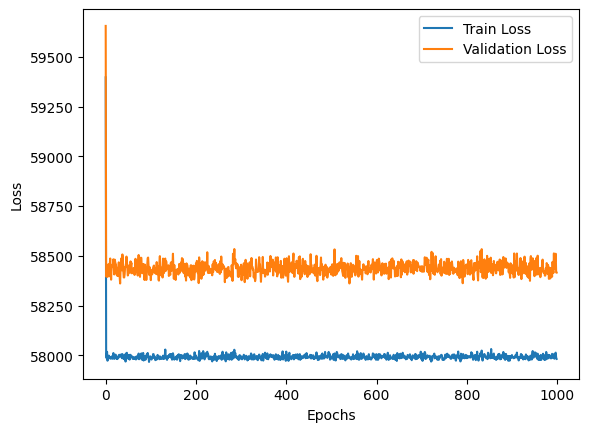

[ 1.30130029e+02 -8.55280535e-01  5.19860012e+02  7.35597106e+02
 -2.80611590e-01  8.08027755e+02  4.43003729e+02 -2.24917958e+00
  6.48472045e+02  2.26314415e+02 -8.29926711e-01  2.07852057e+00
  7.59379964e+02  6.61350250e+02  6.86706051e-01  5.29438521e+02
  2.91207416e+01  4.50083645e+02  4.13075985e+02  6.94588821e+02
  9.57415569e+01  1.92207836e+00  1.03617789e+02  4.92078219e+02
 -1.46478393e+00]
1246.0152548405429


In [44]:
file_path = 'linear_regression_train.csv'
model = LinearRegression(learning_rate=0.01, epochs=1000, lambda_=0.1, regularization="l2", optimizer="mini-batch", batch_size=100)

X, y = model.load_data(file_path)
model.fit(X, y, val_ratio=0.2)
model.plot_loss()
print(model.weights)
print(model.bias)

Epoch    0: Train Loss = 3043863.7419, Val Loss = 3039578.6073
Epoch   10: Train Loss = 2503213.2809, Val Loss = 2499060.2606
Epoch   20: Train Loss = 2060477.5352, Val Loss = 2056499.6977
Epoch   30: Train Loss = 1697919.7984, Val Loss = 1694146.3917
Epoch   40: Train Loss = 1401016.9719, Val Loss = 1397466.4286
Epoch   50: Train Loss = 1157877.1815, Val Loss = 1154559.5457
Epoch   60: Train Loss = 958762.9597, Val Loss = 955681.8406
Epoch   70: Train Loss = 795700.8541, Val Loss = 792854.9934
Epoch   80: Train Loss = 662161.7924, Val Loss = 659546.3174
Epoch   90: Train Loss = 552799.3779, Val Loss = 550406.7979
Epoch  100: Train Loss = 463235.6131, Val Loss = 461056.6071
Epoch  110: Train Loss = 389885.4539, Val Loss = 387909.4905
Epoch  120: Train Loss = 329813.1572, Val Loss = 328028.9772
Epoch  130: Train Loss = 280614.6583, Val Loss = 279010.6474
Epoch  140: Train Loss = 240321.2598, Val Loss = 238885.7331
Epoch  150: Train Loss = 207320.7718, Val Loss = 206042.1874
Epoch  160: 

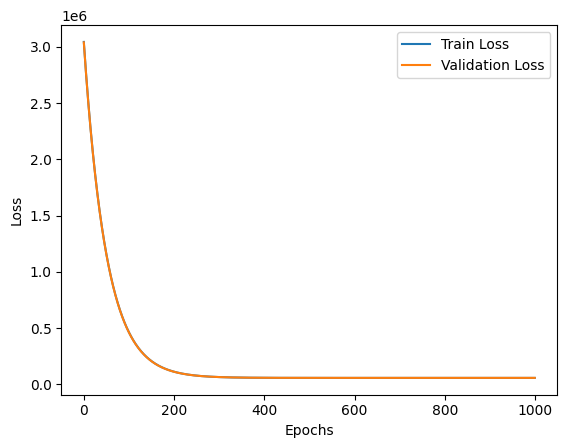

[ 1.31375858e+02  8.98735314e-02  5.21360615e+02  7.36735158e+02
 -2.53059557e-01  8.10426690e+02  4.42575832e+02 -1.62454586e+00
  6.47053499e+02  2.26394029e+02  1.20809375e+00  6.82995228e-01
  7.61008131e+02  6.62969968e+02 -1.37538045e+00  5.28292487e+02
  3.07030597e+01  4.51529031e+02  4.12645377e+02  6.94744669e+02
  9.65091884e+01  2.53228734e+00  1.06010729e+02  4.93212960e+02
  1.17603339e+00]
1247.9521969732289


In [10]:
file_path = 'linear_regression_train.csv'
model = LinearRegression(learning_rate=0.01, epochs=1000, lambda_=0.1, optimizer="batch")

X, y = model.load_data(file_path)
model.fit(X, y, val_ratio=0.2)
model.plot_loss()
print(model.weights)
print(model.bias)

In [60]:
file_path = 'linear_regression_train.csv'
model = LinearRegression(learning_rate=0.01, epochs=1000, lambda_=0.1, optimizer="normal")

X, y = model.load_data(file_path)
model.fit(X, y, val_ratio=0.2)

print(model.weights)
print(model.bias)

Training completed using the Normal Equation.
Final Train Loss = 57947.5534, Final Val Loss = 58375.9868
Linear Regression MSE on validation set normal: 116751.9736, R2: 0.9749
[ 1.31385055e+02  8.40979407e-02  5.21382516e+02  7.36773047e+02
 -2.53283309e-01  8.10463633e+02  4.42593190e+02 -1.63064639e+00
  6.47083814e+02  2.26401914e+02  1.20577351e+00  6.81305063e-01
  7.61051507e+02  6.63000579e+02 -1.37422452e+00  5.28314091e+02
  3.07119491e+01  4.51550060e+02  4.12665514e+02  6.94777867e+02
  9.65185635e+01  2.53494753e+00  1.06014197e+02  4.93237331e+02
  1.17795813e+00]
1248.0060749522613


Epoch    0: Train Loss = 3043863.7425, Val Loss = 3039578.6097
Epoch   10: Train Loss = 2503213.3451, Val Loss = 2499060.5174
Epoch   20: Train Loss = 2060477.7475, Val Loss = 2056500.5470
Epoch   30: Train Loss = 1697920.2190, Val Loss = 1694148.0740
Epoch   40: Train Loss = 1401017.6418, Val Loss = 1397469.1082
Epoch   50: Train Loss = 1157878.1268, Val Loss = 1154563.3270
Epoch   60: Train Loss = 958764.1951, Val Loss = 955686.7822
Epoch   70: Train Loss = 795702.3855, Val Loss = 792861.1191
Epoch   80: Train Loss = 662163.6191, Val Loss = 659553.6244
Epoch   90: Train Loss = 552801.4944, Val Loss = 550415.2638
Epoch  100: Train Loss = 463238.0102, Val Loss = 461066.1955
Epoch  110: Train Loss = 389888.1200, Val Loss = 387920.1552
Epoch  120: Train Loss = 329816.0793, Val Loss = 328040.6656
Epoch  130: Train Loss = 280617.8221, Val Loss = 279023.3027
Epoch  140: Train Loss = 240324.6507, Val Loss = 238899.2968
Epoch  150: Train Loss = 207324.3750, Val Loss = 206056.6005
Epoch  160: 

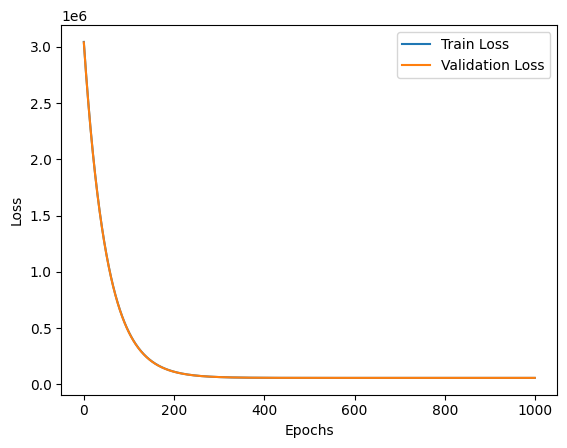

[ 1.31375858e+02  8.98735314e-02  5.21360615e+02  7.36735158e+02
 -2.53059557e-01  8.10426690e+02  4.42575832e+02 -1.62454586e+00
  6.47053499e+02  2.26394029e+02  1.20809375e+00  6.82995228e-01
  7.61008131e+02  6.62969968e+02 -1.37538045e+00  5.28292487e+02
  3.07030597e+01  4.51529031e+02  4.12645377e+02  6.94744669e+02
  9.65091884e+01  2.53228734e+00  1.06010729e+02  4.93212960e+02
  1.17603339e+00]
1247.9521969732289


In [13]:
file_path = 'linear_regression_train.csv'
model = LinearRegression(learning_rate=0.01, epochs=1000, lambda_=0.1, regularization="l2", optimizer="batch")

X, y = model.load_data(file_path)
model.fit(X, y, val_ratio=0.2)
model.plot_loss()
print(model.weights)
print(model.bias)

In [66]:
# Load the dataset (replace 'train.csv' with your file)
train_df = pd.read_csv("linear_regression_train.csv", sep = ",", index_col="ID")

# Drop 'id' column if it exists and identify target column
target_column = "Target"  # Replace with your target column name
X = train_df.drop(columns=[target_column])
y = train_df[target_column]

# Compute correlation matrix
correlation_matrix = train_df.corr()

# Correlation of each feature with the target variable
correlation_with_target = correlation_matrix[target_column]

print("Correlation of Features with Target:")
print(correlation_with_target.drop(target_column))  # Exclude the target itself


Correlation of Features with Target:
Feature_1     0.054712
Feature_2     0.007267
Feature_3     0.240100
Feature_4     0.334281
Feature_5     0.001245
Feature_6     0.378366
Feature_7     0.208324
Feature_8     0.004798
Feature_9     0.296554
Feature_10    0.107068
Feature_11    0.001989
Feature_12    0.003930
Feature_13    0.345396
Feature_14    0.303748
Feature_15   -0.003615
Feature_16    0.242049
Feature_17    0.008446
Feature_18    0.210722
Feature_19    0.189911
Feature_20    0.319535
Feature_21    0.036158
Feature_22   -0.004131
Feature_23    0.049288
Feature_24    0.229108
Feature_25   -0.001892
Name: Target, dtype: float64


In [ ]:
file_path = 'linear_regression_train.csv'
model = LinearRegression(learning_rate=10, epochs=250, lambda_=0.1, optimizer="adam")

X, y = model.load_data(file_path)
model.fit(X, y, val_ratio=0.2)
model.plot_loss()
print(model.weights)
print(model.bias)

Epoch    0: Train Loss = 3015740.8363, Val Loss = 3011189.0153
Epoch   10: Train Loss = 2231788.1334, Val Loss = 2234744.4225
Epoch   20: Train Loss = 1619724.8500, Val Loss = 1623485.0615
Epoch   30: Train Loss = 1157305.9813, Val Loss = 1159200.0178
Epoch   40: Train Loss = 823884.0082, Val Loss = 825347.5315
Epoch   50: Train Loss = 590588.4571, Val Loss = 591951.1863
Epoch   60: Train Loss = 430335.6117, Val Loss = 431169.9920
Epoch   70: Train Loss = 320450.6787, Val Loss = 320835.1102
Epoch   80: Train Loss = 244474.3922, Val Loss = 244553.3793
Epoch   90: Train Loss = 191424.0527, Val Loss = 191251.5274
Epoch  100: Train Loss = 154001.7888, Val Loss = 153665.5818
Epoch  110: Train Loss = 127301.5549, Val Loss = 126893.2376
Epoch  120: Train Loss = 108037.0972, Val Loss = 107636.7550
Epoch  130: Train Loss = 94010.8837, Val Loss = 93673.0420
Epoch  140: Train Loss = 83748.7947, Val Loss = 83501.8617
Epoch  150: Train Loss = 76242.4642, Val Loss = 76093.1973
Epoch  160: Train Loss

Epoch    0: Train Loss = 1.8510144104366758838691549e-06, Val Loss = 1.8497218450622243025594773e-06
Epoch   10: Train Loss = 7.4925394486430002850547820e-06, Val Loss = 7.4161116109317595383775348e-06
Epoch   20: Train Loss = 4.0049922661038956706903991e-06, Val Loss = 3.9746621107751734460378397e-06
Epoch   30: Train Loss = 2.2593945184679350286739100e-06, Val Loss = 2.2503656504977184621180304e-06
Epoch   40: Train Loss = 6.4836474971122311101572608e-07, Val Loss = 6.4578592272472741628064645e-07
Epoch   50: Train Loss = 2.3546738237206402248443890e-07, Val Loss = 2.3194577773601550489636011e-07
Epoch   60: Train Loss = 1.8518830220185368268029087e-07, Val Loss = 1.8404930411921305826950998e-07
Epoch   70: Train Loss = 4.5200324331432688145541245e-08, Val Loss = 4.5033914573566418513111796e-08
Epoch   80: Train Loss = 2.1045643978893673715221214e-08, Val Loss = 2.1113186869620481965161745e-08
Epoch   90: Train Loss = 4.8603793530649998049770509e-09, Val Loss = 4.87314925585192940167

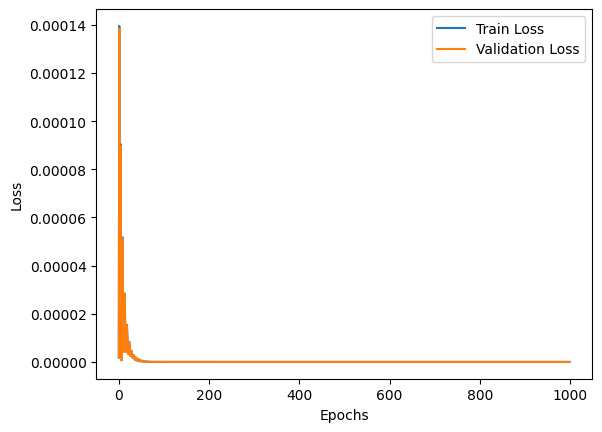

[1.28442616e-09 1.16502856e-10 1.49668730e-09 7.61500282e-10
 2.17259379e-10]
-3.6211120048460947e-10


In [49]:
file_path = 'polynomial_regression_train.csv'
model = LinearRegression(learning_rate=0.01, epochs=1000, lambda_=0.1, optimizer="adam")

X, y = model.load_data(file_path)
model.fit(X, y, val_ratio=0.2)
model.plot_loss()
print(model.weights)
print(model.bias)